# Chicago Car Crash 

- read in dataset from https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if
- 
- 

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

from mlxtend.evaluate import feature_importance_permutation

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sn

In [2]:
df = pd.read_csv('../data/Traffic_Crashes_-_Crashes.csv')

In [3]:
df

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501399,f37d01cdad7c3e9fe01562aa11857405cc2ea38738d8b6...,JE116847,NaN,01/19/2021 07:30:00 AM,15,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,FIXED OBJECT,...,0.0,0.0,2.0,0.0,7,3,1,41.877790,-87.636488,POINT (-87.636487589354 41.877790161619)
501400,f1dba052d8fc8c80d3d693296ff8e0d7cc71d5929677b0...,JE118336,NaN,01/20/2021 05:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,...,0.0,0.0,2.0,0.0,17,4,1,41.800697,-87.706358,POINT (-87.706357916164 41.800697419369)
501401,f2962f241a302417913e1b7465e8ae37e6f3161adaa0cf...,JE118196,NaN,01/20/2021 04:15:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,16,4,1,41.924709,-87.717371,POINT (-87.717371333013 41.924708659649)
501402,f361f7362d783dc327e5e6b7d2d9bc4bd942284391ad36...,JE118233,NaN,01/20/2021 03:20:00 PM,30,STOP SIGN/FLASHER,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,ANGLE,...,0.0,0.0,4.0,0.0,15,4,1,41.802871,-87.684416,POINT (-87.684416341899 41.802870816721)


In [4]:
# Checking out the dataframe columns
df.PRIM_CONTRIBUTORY_CAUSE.value_counts().index

Index(['UNABLE TO DETERMINE', 'FAILING TO YIELD RIGHT-OF-WAY',
       'FOLLOWING TOO CLOSELY', 'NOT APPLICABLE',
       'IMPROPER OVERTAKING/PASSING', 'IMPROPER BACKING',
       'FAILING TO REDUCE SPEED TO AVOID CRASH', 'IMPROPER LANE USAGE',
       'IMPROPER TURNING/NO SIGNAL', 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
       'DISREGARDING TRAFFIC SIGNALS', 'WEATHER',
       'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'DISREGARDING STOP SIGN', 'DISTRACTION - FROM INSIDE VEHICLE',
       'EQUIPMENT - VEHICLE CONDITION', 'PHYSICAL CONDITION OF DRIVER',
       'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
       'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
       'DRIVING ON WRONG SIDE/WRONG WAY', 'DISTRACTION - FROM OUTSIDE VEHICLE',
       'EXCEEDING AUTHORIZED SPEED LIMIT',
       'EXCEEDING SAFE SPEED FOR CONDITIONS',
       'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
       'ROAD CONSTRUCTION/MAINTENANCE'

In [5]:
# filling all na with UNKNOWN string, so we can encode later
df.fillna('UNKOWN', inplace=True)

In [6]:
# dropping the unecessary columns that does not make sense
df.drop(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'RD_NO', 'REPORT_TYPE', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 
         'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'WORKERS_PRESENT_I', 'INJURIES_UNKNOWN', 'LONGITUDE', 'LATITUDE',
         'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL','INJURIES_INCAPACITATING', 
         'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'DAMAGE',
         'DATE_POLICE_NOTIFIED', 'CRASH_TYPE','NUM_UNITS','STREET_DIRECTION','STREET_NAME', 'LANE_CNT'], axis=1, inplace=True)

In [7]:
df

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
0,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,...,UNKOWN,IMPROPER BACKING,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,17,4,7,POINT (-87.773287883007 41.919663832993)
1,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,16,6,6,POINT (-87.740953581987 41.741803598989)
2,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,...,UNKOWN,FAILING TO YIELD RIGHT-OF-WAY,FAILING TO YIELD RIGHT-OF-WAY,UNKOWN,UNKOWN,UNKOWN,10,6,7,POINT (-87.585022352022 41.773455972008)
3,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,...,Y,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,1,7,7,POINT (-87.622114914961 41.802118543011)
4,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,STRAIGHT AND LEVEL,DRY,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,14,4,7,UNKOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501399,01/19/2021 07:30:00 AM,15,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,FIXED OBJECT,PARKING LOT,STRAIGHT AND LEVEL,DRY,...,UNKOWN,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,7,3,1,POINT (-87.636487589354 41.877790161619)
501400,01/20/2021 05:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,Y,UNABLE TO DETERMINE,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,17,4,1,POINT (-87.706357916164 41.800697419369)
501401,01/20/2021 04:15:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,...,UNKOWN,FOLLOWING TOO CLOSELY,FAILING TO REDUCE SPEED TO AVOID CRASH,UNKOWN,UNKOWN,UNKOWN,16,4,1,POINT (-87.717371333013 41.924708659649)
501402,01/20/2021 03:20:00 PM,30,STOP SIGN/FLASHER,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,WET,...,N,FAILING TO YIELD RIGHT-OF-WAY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,UNKOWN,UNKOWN,UNKOWN,15,4,1,POINT (-87.684416341899 41.802870816721)


In [8]:
# We have speed limits that are not logged correctly, so we will drop them.
# There wasn't a lot so this will not effect our data
list_ = [3, 9, 99, 39, 1, 2, 32, 33, 6, 24, 11, 34, 18, 12, 36, 7, 14, 16, 38, 31, 22, 23, 63, 4, 26]
for n in list_:
    df.drop(index=df[df['POSTED_SPEED_LIMIT'] == n].index, inplace=True)

In [9]:
df

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
0,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,...,UNKOWN,IMPROPER BACKING,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,17,4,7,POINT (-87.773287883007 41.919663832993)
1,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,16,6,6,POINT (-87.740953581987 41.741803598989)
2,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,...,UNKOWN,FAILING TO YIELD RIGHT-OF-WAY,FAILING TO YIELD RIGHT-OF-WAY,UNKOWN,UNKOWN,UNKOWN,10,6,7,POINT (-87.585022352022 41.773455972008)
3,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,...,Y,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,1,7,7,POINT (-87.622114914961 41.802118543011)
4,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,STRAIGHT AND LEVEL,DRY,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,14,4,7,UNKOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501399,01/19/2021 07:30:00 AM,15,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,FIXED OBJECT,PARKING LOT,STRAIGHT AND LEVEL,DRY,...,UNKOWN,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,7,3,1,POINT (-87.636487589354 41.877790161619)
501400,01/20/2021 05:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,Y,UNABLE TO DETERMINE,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,17,4,1,POINT (-87.706357916164 41.800697419369)
501401,01/20/2021 04:15:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,...,UNKOWN,FOLLOWING TOO CLOSELY,FAILING TO REDUCE SPEED TO AVOID CRASH,UNKOWN,UNKOWN,UNKOWN,16,4,1,POINT (-87.717371333013 41.924708659649)
501402,01/20/2021 03:20:00 PM,30,STOP SIGN/FLASHER,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,WET,...,N,FAILING TO YIELD RIGHT-OF-WAY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,UNKOWN,UNKOWN,UNKOWN,15,4,1,POINT (-87.684416341899 41.802870816721)


## OneHotEncoding: FIRST_CRASH_TYPE

In [10]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [11]:
# Creating a new dataframe for FIRST_CRASH_TYPE
# Then we will OneHotEncode the data to categories
crash_type = df['FIRST_CRASH_TYPE']
crash_df = pd.DataFrame(crash_type, columns=['FIRST_CRASH_TYPE'])
crash_df = pd.DataFrame(ohe.fit_transform(crash_df[['FIRST_CRASH_TYPE']]).toarray())
crash_df.columns = ohe.get_feature_names(['FIRST_CRASH_TYPE'])

In [12]:
# # Each column will be a FIRST_CRASH_TYPE, so we will need to label each column
# crash_col = df['FIRST_CRASH_TYPE'].unique()
# crash_df.columns = crash_col

In [13]:
crash_df.columns

Index(['FIRST_CRASH_TYPE_ANGLE', 'FIRST_CRASH_TYPE_ANIMAL',
       'FIRST_CRASH_TYPE_FIXED OBJECT', 'FIRST_CRASH_TYPE_HEAD ON',
       'FIRST_CRASH_TYPE_OTHER NONCOLLISION', 'FIRST_CRASH_TYPE_OTHER OBJECT',
       'FIRST_CRASH_TYPE_OVERTURNED', 'FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE',
       'FIRST_CRASH_TYPE_PEDALCYCLIST', 'FIRST_CRASH_TYPE_PEDESTRIAN',
       'FIRST_CRASH_TYPE_REAR END', 'FIRST_CRASH_TYPE_REAR TO FRONT',
       'FIRST_CRASH_TYPE_REAR TO REAR', 'FIRST_CRASH_TYPE_REAR TO SIDE',
       'FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION',
       'FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION', 'FIRST_CRASH_TYPE_TRAIN',
       'FIRST_CRASH_TYPE_TURNING'],
      dtype='object')

In [14]:
crash_df

,FIRST_CRASH_TYPE_ANGLE,FIRST_CRASH_TYPE_ANIMAL,FIRST_CRASH_TYPE_FIXED OBJECT,FIRST_CRASH_TYPE_HEAD ON,FIRST_CRASH_TYPE_OTHER NONCOLLISION,FIRST_CRASH_TYPE_OTHER OBJECT,FIRST_CRASH_TYPE_OVERTURNED,FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE,FIRST_CRASH_TYPE_PEDALCYCLIST,FIRST_CRASH_TYPE_PEDESTRIAN,FIRST_CRASH_TYPE_REAR END,FIRST_CRASH_TYPE_REAR TO FRONT,FIRST_CRASH_TYPE_REAR TO REAR,FIRST_CRASH_TYPE_REAR TO SIDE,FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION,FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION,FIRST_CRASH_TYPE_TRAIN,FIRST_CRASH_TYPE_TURNING
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500922,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500925,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## LabelEncoding: FEATURES

In [15]:
# Here we select the features we want to use and LabelEncode them using a for loop
# We will also create a new dataframe for them
text_col = ['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE', 
            'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I',
            'HIT_AND_RUN_I', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE','DOORING_I', 'WORK_ZONE_I', 
            'WORK_ZONE_TYPE']

en_df = pd.DataFrame()
for col in text_col:
    encoder = LabelEncoder()
    en_df[col] = encoder.fit_transform(df[col])
    
en_df

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE
0,4,3,2,3,10,3,0,1,1,1,1,21,36,1,1,3
1,15,1,2,3,8,3,0,1,2,1,1,18,26,1,1,3
2,16,1,2,3,6,3,0,1,1,1,1,18,18,1,1,3
3,4,3,2,0,2,3,0,1,1,1,2,36,36,1,1,3
4,4,3,2,3,4,3,0,1,1,1,1,36,36,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500922,4,3,3,3,12,3,0,1,1,1,1,12,26,1,1,3
500923,4,3,2,1,8,3,0,1,1,1,2,36,26,1,1,3
500924,16,1,2,3,8,3,4,1,1,1,1,19,17,1,1,3
500925,15,3,3,3,8,3,6,1,2,1,0,18,12,1,1,3


In [16]:
# Merge the FIRST_CRASH_TYPE and the LabelEncoded dataframe together
df2 = pd.merge(crash_df, en_df, left_index=True, right_index=True)

In [17]:
# Here we have the Features and all Crash types 
df2

,FIRST_CRASH_TYPE_ANGLE,FIRST_CRASH_TYPE_ANIMAL,FIRST_CRASH_TYPE_FIXED OBJECT,FIRST_CRASH_TYPE_HEAD ON,FIRST_CRASH_TYPE_OTHER NONCOLLISION,FIRST_CRASH_TYPE_OTHER OBJECT,FIRST_CRASH_TYPE_OVERTURNED,FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE,FIRST_CRASH_TYPE_PEDALCYCLIST,FIRST_CRASH_TYPE_PEDESTRIAN,...,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,1,21,36,1,1,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,2,1,1,18,26,1,1,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,1,18,18,1,1,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,1,1,2,36,36,1,1,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,1,1,1,36,36,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500922,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,1,12,26,1,1,3
500923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,2,36,26,1,1,3
500924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,1,1,1,1,19,17,1,1,3
500925,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,1,2,1,0,18,12,1,1,3


## TARGET: Rear End

In [18]:
# Defining our Features and Target
# For X, we want to remove all of the other CRASH types and keep the features.
y = df2['FIRST_CRASH_TYPE_REAR END']
X = df2.drop(columns=crash_df.columns.tolist(), axis=1)

In [19]:
X.columns

Index(['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE'],
      dtype='object')

## Vanilla - DecisionTreeClassifier: Rear End

In [20]:
# Train and Test on a Vanilla model (test size to 20%)
dt_model = DecisionTreeClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [21]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

In [23]:
# Test: accuracy_score with diff. parameters
# 0.9491827562831103 (stratify=y ONLY) <--- Decided to use this parameter only since it returned a higher score. 
# 0.8689271636244947 (BOTH class_weight='balanced and stratify=y'
# 0.868148836275076 (class_weight='balanced' ONLY)

In [24]:
print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred)}')
print(f'ROC_AUC Test: {roc_auc_score(y_test, y_test_pred)}')

Accuracy Score Train: 0.8971904546827003
Accuracy Score Test: 0.8419639470584712
ROC_AUC Test: 0.743909701806217


### Feature Importance DTC

In [25]:
# Lets look at which feature is the most important
dt_model.feature_importances_

array([0.07013474, 0.02082695, 0.03220398, 0.04196394, 0.05918816,
       0.01185081, 0.02658643, 0.02004844, 0.01848338, 0.00662718,
       0.02072659, 0.59075516, 0.07581207, 0.00154479, 0.00160517,
       0.00164221])

In [26]:
# TRAFFICWAY_TYPE, PRIM_CONTRIBUTORY_CAUSE, SEC_CONTRIBUTORY_CAUSE, NOT_RIGHT_OF_WAY_I, 
# LIGHTING_CONDITION, WEATHER_CONDITION
# seems to be the most important
X

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE
0,4,3,2,3,10,3,0,1,1,1,1,21,36,1,1,3
1,15,1,2,3,8,3,0,1,2,1,1,18,26,1,1,3
2,16,1,2,3,6,3,0,1,1,1,1,18,18,1,1,3
3,4,3,2,0,2,3,0,1,1,1,2,36,36,1,1,3
4,4,3,2,3,4,3,0,1,1,1,1,36,36,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500922,4,3,3,3,12,3,0,1,1,1,1,12,26,1,1,3
500923,4,3,2,1,8,3,0,1,1,1,2,36,26,1,1,3
500924,16,1,2,3,8,3,4,1,1,1,1,19,17,1,1,3
500925,15,3,3,3,8,3,6,1,2,1,0,18,12,1,1,3


Feature ranking:
1. feature 11 (0.590755)
2. feature 12 (0.075812)
3. feature 0 (0.070135)
4. feature 4 (0.059188)
5. feature 3 (0.041964)
6. feature 2 (0.032204)
7. feature 6 (0.026586)
8. feature 1 (0.020827)
9. feature 10 (0.020727)
10. feature 7 (0.020048)
11. feature 8 (0.018483)
12. feature 5 (0.011851)
13. feature 9 (0.006627)
14. feature 15 (0.001642)
15. feature 14 (0.001605)
16. feature 13 (0.001545)


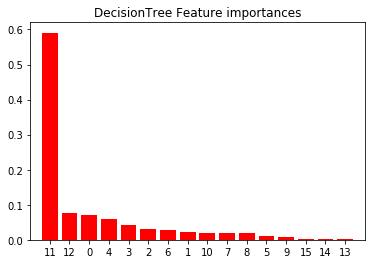

In [27]:
# Here we graph out which feature is the most imporant.

importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("DecisionTree Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [28]:
# This plot tree helper function can plot the DecisionTreeClassifier 
# We can check what feature our model is splitting on and what are the requirements
def plot_tree(dt, used_cols, out_file='mytree.png'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

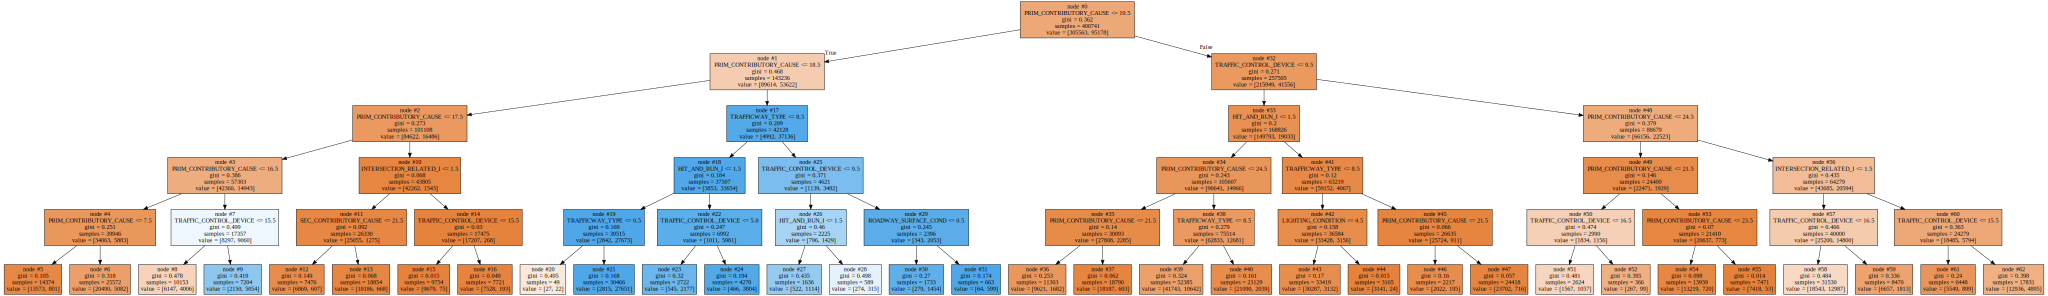

In [29]:
# Since we have a lot of data, lets only set max_depth=5
# This will speed up the process to graph
dt_model2 = DecisionTreeClassifier(random_state=1, max_depth=5)
dt_model2.fit(X_train, y_train)
plot_tree(dt_model2, X.columns.tolist())

### DTC(Rear End): w/ Parameters

In [30]:
# Changing the models parameters if we could get a better score
dt_model2 = DecisionTreeClassifier(random_state=1, max_depth=10, max_leaf_nodes=30)

In [31]:
dt_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30, random_state=1)

In [32]:
# Our scores
y_train_pred2 = dt_model2.predict(X_train)
y_test_pred2 = dt_model2.predict(X_test)
print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred2)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred2)}')
print(f'ROC_AUC Test: {roc_auc_score(y_test, y_test_pred2)}')

Accuracy Score Train: 0.8517970459723363
Accuracy Score Test: 0.8534825225081348
ROC_AUC Test: 0.7267379146363127


### Looks like our Vanilla DecisionTree model did better.

## Vanilla RandomForestClassifier: Rear End (minor parameter changes)

In [33]:
rf = RandomForestClassifier(class_weight='balanced', random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [34]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [35]:
print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred)}')
print(f'ROC_AUC Test: {roc_auc_score(y_test, y_test_pred)}')
# ROC_AUC: It tells how much a model is capable of distinguishing between classes.

Accuracy Score Train: 0.8571995378561216
Accuracy Score Test: 0.8088954544547142
ROC_AUC Test: 0.7826416745938656


- stratify=y (ONLY)
- Accuracy Score Train: 0.9785863138205054
- Accuracy Score Test: 0.9565768661025885
- ROC_AUC Test: 0.5944350490886352

- class_weight='balanced' (ONLY)
- Accuracy Score Train: 0.9228473329399801
- Accuracy Score Test: 0.894160034145974
- ROC_AUC Test: 0.6537365887087091

#### Decicded to use these parameters since they were the higher roc_auc_score. 
- stratify=y & class_weight='balanced' (BOTH)
- Accuracy Score Train: 0.926487942051546
- Accuracy Score Test: 0.8989555349117477
- ROC_AUC Test: 0.6626472327051802

### Feature Importance: RandomForestClassifier

Feature ranking:
1. feature 11 (0.475663)
2. feature 12 (0.102662)
3. feature 4 (0.093639)
4. feature 0 (0.068727)
5. feature 3 (0.046157)
6. feature 1 (0.040723)
7. feature 8 (0.034370)
8. feature 2 (0.030776)
9. feature 10 (0.029785)
10. feature 6 (0.026431)
11. feature 7 (0.022813)
12. feature 5 (0.011959)
13. feature 9 (0.010742)
14. feature 13 (0.002148)
15. feature 14 (0.001837)
16. feature 15 (0.001568)


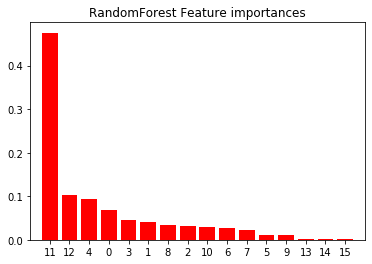

In [36]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("RandomForest Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [37]:
X
#PRIM_CONTRIBUTORY_CAUSE, TRAFFICWAY_TYPE, NOT_RIGHT_OF_WAY_I

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE
0,4,3,2,3,10,3,0,1,1,1,1,21,36,1,1,3
1,15,1,2,3,8,3,0,1,2,1,1,18,26,1,1,3
2,16,1,2,3,6,3,0,1,1,1,1,18,18,1,1,3
3,4,3,2,0,2,3,0,1,1,1,2,36,36,1,1,3
4,4,3,2,3,4,3,0,1,1,1,1,36,36,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500922,4,3,3,3,12,3,0,1,1,1,1,12,26,1,1,3
500923,4,3,2,1,8,3,0,1,1,1,2,36,26,1,1,3
500924,16,1,2,3,8,3,4,1,1,1,1,19,17,1,1,3
500925,15,3,3,3,8,3,6,1,2,1,0,18,12,1,1,3


## RandomForestClassifier: Hyperparameters (GridSearchCV)

In [38]:
# Here we set a some parameters that the GridSearch will run through.
grid_p = {"n_estimators": [50, 100],
          "criterion": ["gini", "entropy"],
          "max_depth": [4, 6, 10],
          "min_samples_split": [5, 10],
          "min_samples_leaf": [5, 10],
         "max_samples": [400]}

grid_search = GridSearchCV(rf, grid_p, n_jobs=-1, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 10], 'max_samples': [400],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 100]},
             scoring='roc_auc')

In [39]:
grid_search.best_score_

0.8334422253380342

In [40]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_samples': 400,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 100}

{'criterion': 'gini',
 'max_depth': 6,
 'max_samples': 400,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 50}
 
ROC_AUC_SCORE: 0.7902454236508376
------------------------------------------------
{'criterion': 'entropy',
 'max_depth': 10,
 'max_samples': 400,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 100}
 
ROC_AUC_SCORE: 0.8107810190937267
-----------------------------------------------

## Data Visual: Rear End Crashes

In [41]:
# Feature 4
df['TRAFFICWAY_TYPE'].value_counts()

NOT DIVIDED                        222937
DIVIDED - W/MEDIAN (NOT RAISED)     88043
ONE-WAY                             66534
PARKING LOT                         35404
DIVIDED - W/MEDIAN BARRIER          29757
FOUR WAY                            16808
OTHER                               14215
ALLEY                                8211
UNKNOWN                              5402
CENTER TURN LANE                     4226
T-INTERSECTION                       3586
DRIVEWAY                             1732
RAMP                                 1581
UNKNOWN INTERSECTION TYPE            1025
FIVE POINT, OR MORE                   424
Y-INTERSECTION                        424
TRAFFIC ROUTE                         312
NOT REPORTED                          136
ROUNDABOUT                            110
L-INTERSECTION                         60
Name: TRAFFICWAY_TYPE, dtype: int64

In [42]:
# Feature 11
df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 186006
FAILING TO YIELD RIGHT-OF-WAY                                                        54962
FOLLOWING TOO CLOSELY                                                                52819
NOT APPLICABLE                                                                       26815
IMPROPER OVERTAKING/PASSING                                                          23780
IMPROPER BACKING                                                                     21834
FAILING TO REDUCE SPEED TO AVOID CRASH                                               21628
IMPROPER LANE USAGE                                                                  19286
IMPROPER TURNING/NO SIGNAL                                                           16582
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  15729
DISREGARDING TRAFFIC SIGNALS                                                          9131

In [43]:
# Selecting the columns with only "REAR END" crashes
rear_end = df[df['FIRST_CRASH_TYPE'] == 'REAR END']
rear_end.TRAFFICWAY_TYPE.value_counts().index
rear_end.PRIM_CONTRIBUTORY_CAUSE.value_counts().index

Index(['FOLLOWING TOO CLOSELY', 'UNABLE TO DETERMINE',
       'FAILING TO REDUCE SPEED TO AVOID CRASH', 'NOT APPLICABLE',
       'IMPROPER BACKING', 'WEATHER', 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
       'FAILING TO YIELD RIGHT-OF-WAY', 'DISTRACTION - FROM INSIDE VEHICLE',
       'IMPROPER OVERTAKING/PASSING',
       'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'IMPROPER LANE USAGE', 'EQUIPMENT - VEHICLE CONDITION',
       'DISTRACTION - FROM OUTSIDE VEHICLE', 'PHYSICAL CONDITION OF DRIVER',
       'EXCEEDING SAFE SPEED FOR CONDITIONS',
       'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
       'DISREGARDING TRAFFIC SIGNALS', 'EXCEEDING AUTHORIZED SPEED LIMIT',
       'CELL PHONE USE OTHER THAN TEXTING',
       'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
       'IMPROPER TURNING/NO SIGNAL', 'ROAD CONSTRUCTION/MAINTENANCE',
       'DISREGARDING STOP SIGN',
       'EVASIVE ACTION DUE TO ANIMAL, OBJECT, N

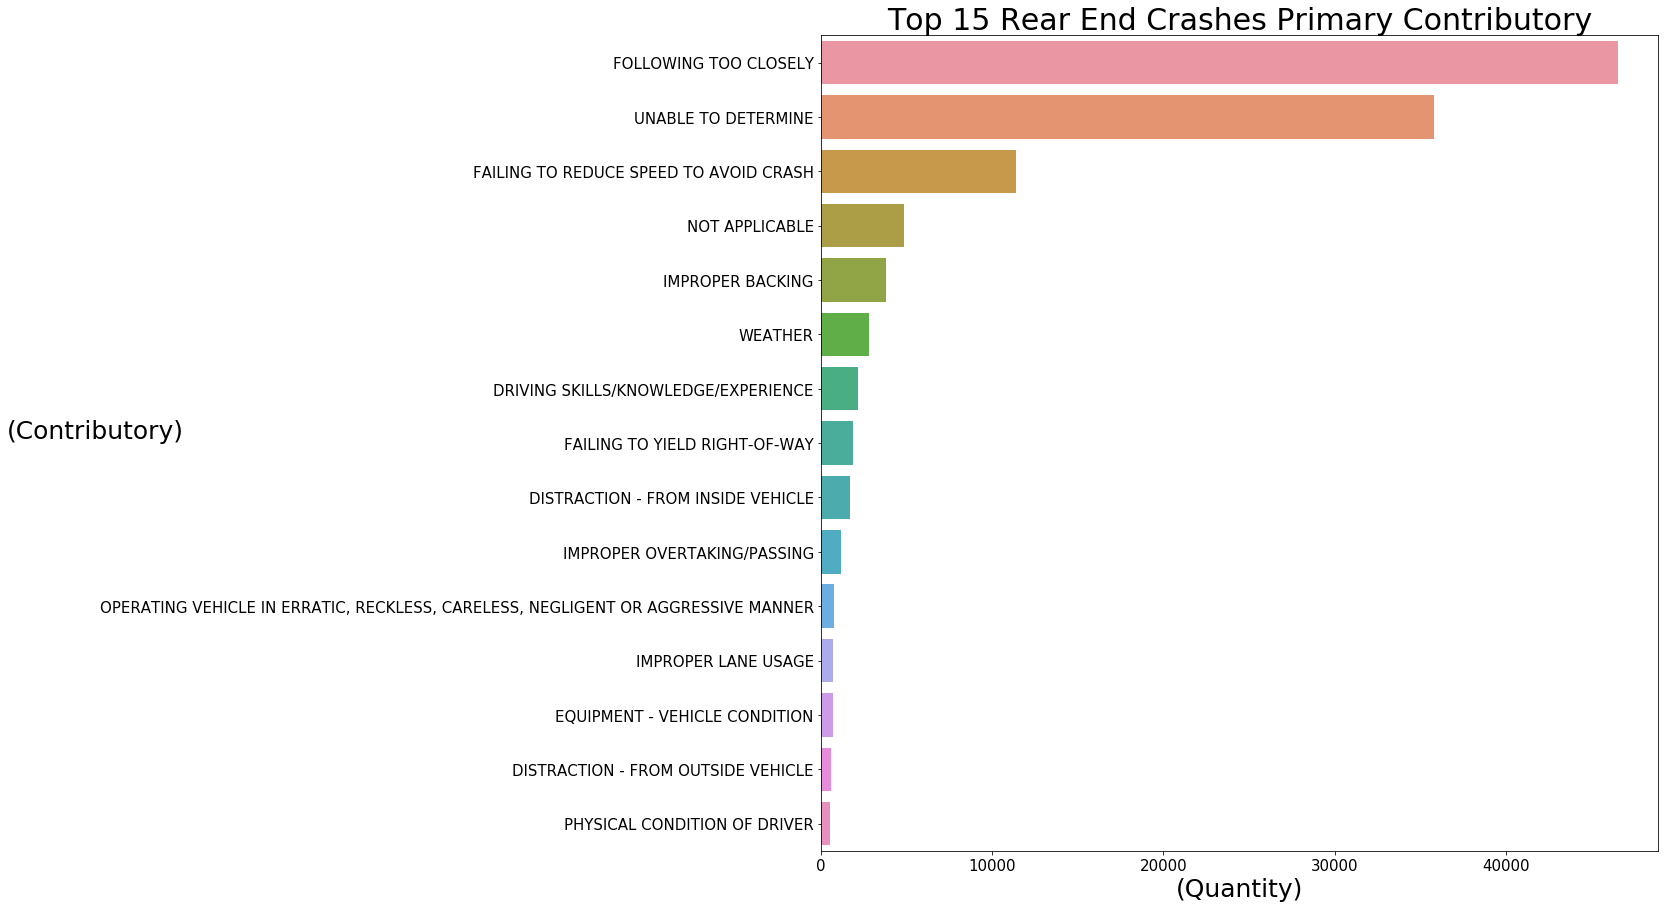

In [44]:
# Bar graph of the top 15 PRIMARY_CONTRIBUTORY

plt.figure(figsize=(15,15))

y= rear_end.PRIM_CONTRIBUTORY_CAUSE.value_counts().values[:15]
x=rear_end.PRIM_CONTRIBUTORY_CAUSE.value_counts().index[:15]

sn.barplot(y, x)
plt.title('Top 15 Rear End Crashes Primary Contributory', size=30)
plt.ylabel("(Contributory)", size=25, rotation=0)
plt.xlabel("(Quantity)", size=25)
plt.xticks(size=15)
plt.yticks(size=15);

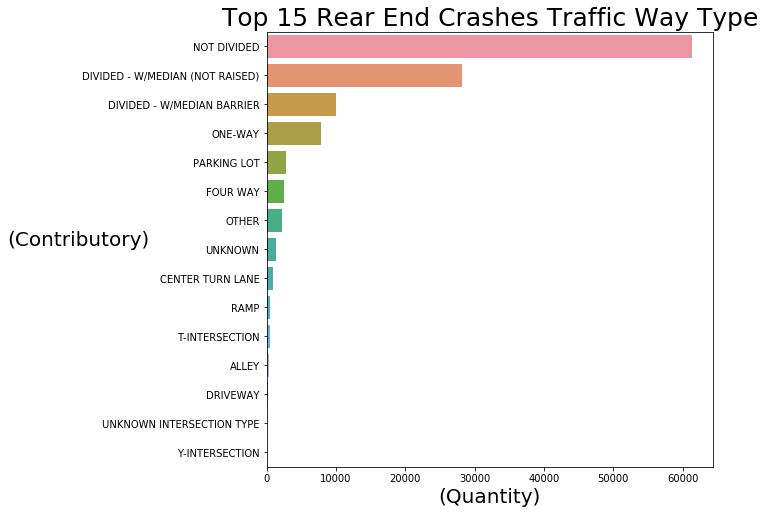

In [45]:
# Bar graph of top 15 Traffic Way Types

plt.figure(figsize=(8,8))

y= rear_end.TRAFFICWAY_TYPE.value_counts().values[:15]
x=rear_end.TRAFFICWAY_TYPE.value_counts().index[:15]

sn.barplot(y, x)
plt.title('Top 15 Rear End Crashes Traffic Way Type', size=25)
plt.ylabel("(Contributory)", size=20, rotation=0)
plt.xlabel("(Quantity)", size=20)
plt.xticks(size=10)
plt.yticks(size=10);